#**HEART DISEASE**

## Goal of Notebook
Tujuan dari notebook ini untuk mengetahui dan memprediksi faktor-faktor apa saja (13 faktor independen) yang kuat dalam penyakit jantung koroner(Target faktor dependen)





## Business Problem
Penyakit jantung merupakan salah satu jenis penyakit yang mematikan yang penanganannya harus diatasi sesegera mungkin karena bisa terjadi secara mendadak kepada penderitanya sejak dini sehingga risiko kemungkinan terjadi serangan mendadak kepada penderitanya. Faktor2 penyakit jantung dapat dikenali berdasarkan kondisi tubuh seseorang penderitanya sejak dini sehingga risiko kemungkinan terjadi serangan mendadak dapat diminimalisir dengan berbagai cara, misalnya pola hidup sehat dan olahraga teratur. kondisi kesehatan pada jantung dapat diketahui berdasarkan diagnosis dari dokter. Tujuan dari notebook ini untuk mengetahui faktor-faktor apa saja (13 faktor) yang kuat dalam penyakit jantung koroner

##Matrics
Metrik pada kasus ini adalah diagnosis yang terkena jantung

## Source Dataset
For kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

##Attribute Information:
The inputs (variable X/ independent variable) are as follows:
- age:age in years
- sex: 1.male ; 0.female
- (cp) chest pain type (4 values):(0.typical angina ; 1.atypical angina ; 2.non-anginal pain ; 3. asymptomatic)
- chol: serum cholestoral in mg/dl
- fbs:fasting blood sugar > 120 mg/dl(1.true ; 0.false)
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The output (target/Y/dependent variable) is as follow:
- Target


#Import Dataset

In [ ]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
df = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(df['heart.csv'].decode('utf-8')))
print(df)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [ ]:
#cek jumlah row dan column
df.shape

(1025, 14)

In [ ]:
#melihat nilai unik
df.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [ ]:
df.sex.unique()

array([1, 0])

In [ ]:
df.cp.unique()

array([0, 1, 2, 3])

In [ ]:
df.trestbps.unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

In [ ]:
df.chol.unique()

array([212, 203, 174, 294, 248, 318, 289, 249, 286, 149, 341, 210, 298,
       204, 308, 266, 244, 211, 185, 223, 208, 252, 209, 307, 233, 319,
       256, 327, 169, 131, 269, 196, 231, 213, 271, 263, 229, 360, 258,
       330, 342, 226, 228, 278, 230, 283, 241, 175, 188, 217, 193, 245,
       232, 299, 288, 197, 315, 215, 164, 326, 207, 177, 257, 255, 187,
       201, 220, 268, 267, 236, 303, 282, 126, 309, 186, 275, 281, 206,
       335, 218, 254, 295, 417, 260, 240, 302, 192, 225, 325, 235, 274,
       234, 182, 167, 172, 321, 300, 199, 564, 157, 304, 222, 184, 354,
       160, 247, 239, 246, 409, 293, 180, 250, 221, 200, 227, 243, 311,
       261, 242, 205, 306, 219, 353, 198, 394, 183, 237, 224, 265, 313,
       340, 259, 270, 216, 264, 276, 322, 214, 273, 253, 176, 284, 305,
       168, 407, 290, 277, 262, 195, 166, 178, 141])

In [ ]:
df.oldpeak.unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [ ]:
df.slope.unique()

array([2, 0, 1])

In [ ]:
df.ca.unique()

array([2, 0, 1, 3, 4])

thal mengandung angka 0, yang mana 0 tidak memeiliki kategori

In [ ]:
df.thal.unique()

array([3, 2, 1, 0])

ca mengandung angka 4, yang mana domain variabel ca harus mengandung nilai 0-3

## Feature Description

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Descriptive Stats

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Insight :
- Rata" age pada pasien adalah 54,43
- Rata" trestbps pada pasien adalah 131,61
- Rata" chol pada pasien adalah 246
- Rata" thalach pada pasien adalah 149,11
- Rata" oldpeak pada pasien adalah 1,07


# Data Prepocessing

## Missing Values

In [ ]:
# checking for missing values
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# checking the number of missing data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Unnecesarry Columns/Rows

In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
#drop baris yang ca=4 dan thal=0
df=df[df['ca']!=4]
df=df[df['thal']!=0]
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

## Check Duplicate Values

In [ ]:
# Check duplicate values
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
#Dropping duplicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [ ]:
df.shape

(296, 14)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
cp,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
trestbps,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
chol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
restecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
thalach,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exang,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
oldpeak,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


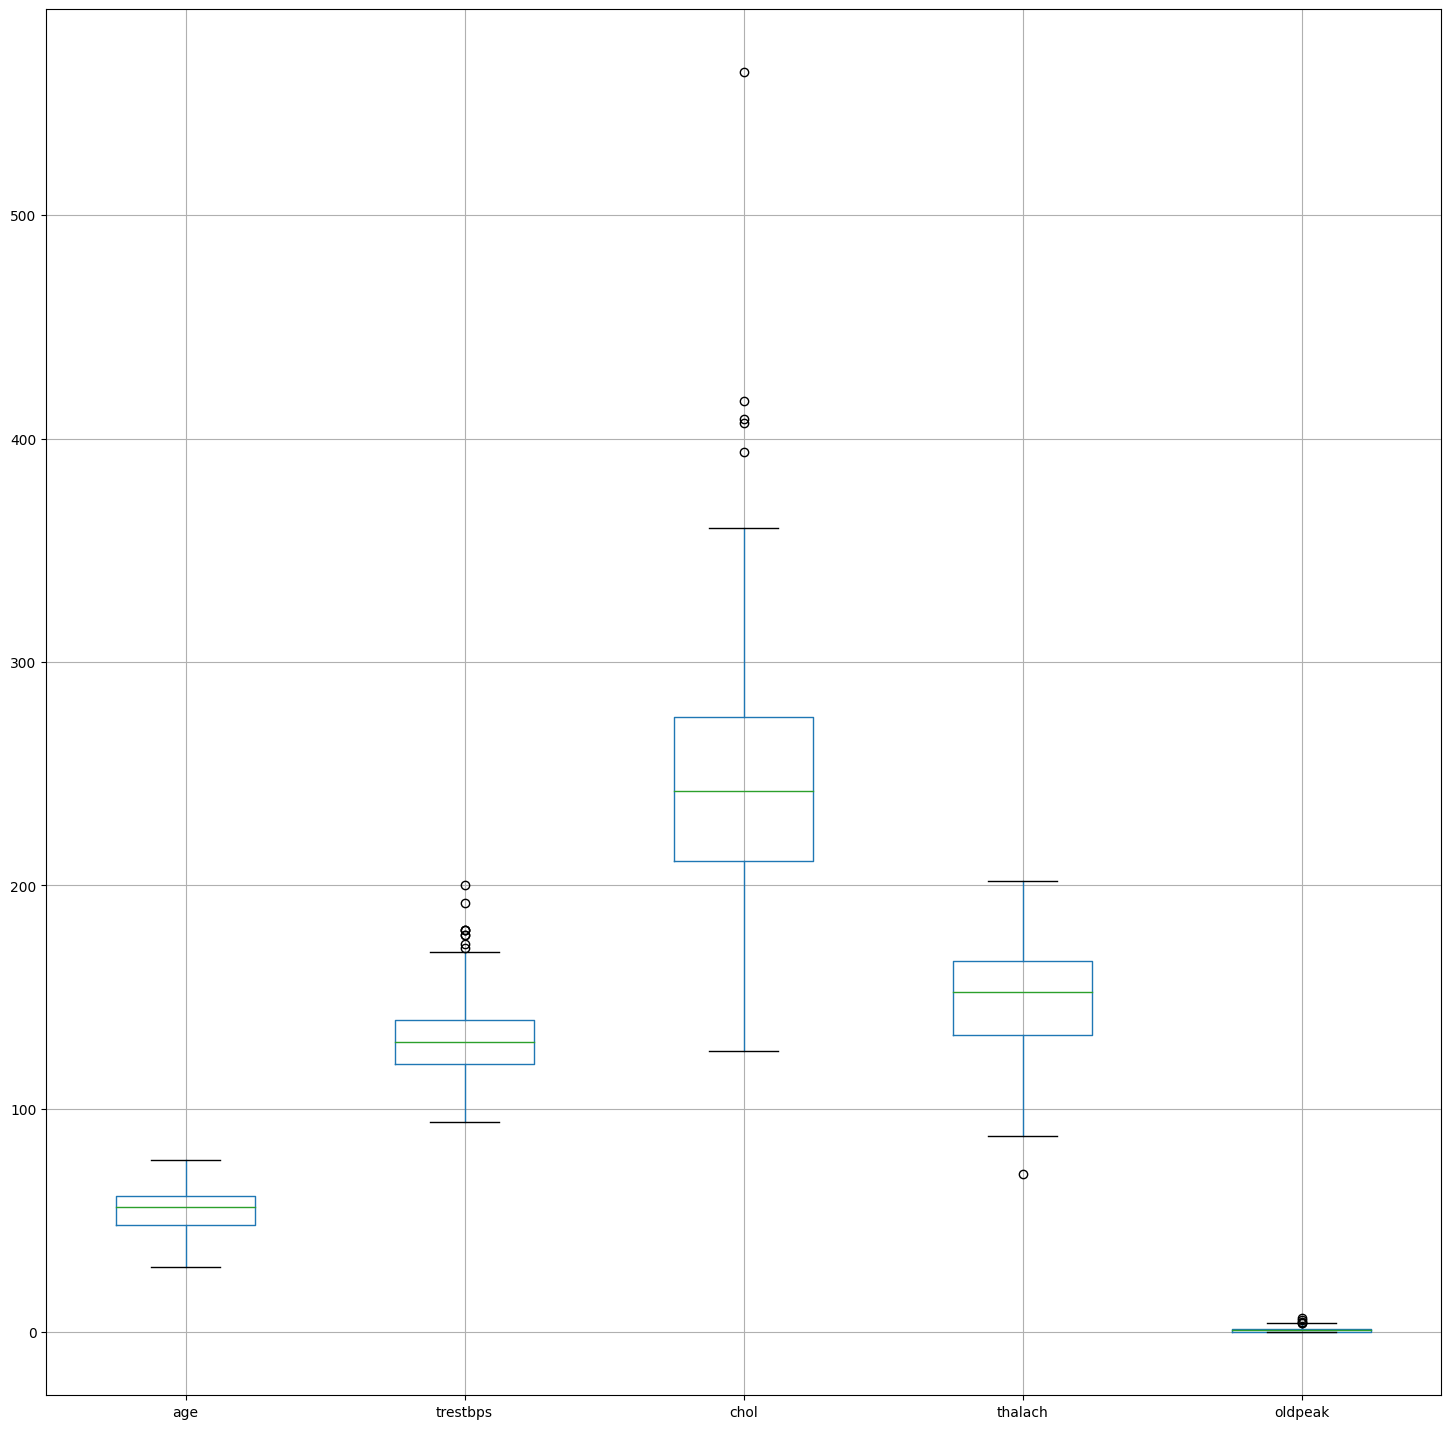

In [ ]:
#Boxplot
plt.figure(figsize=(18,18))
df[["age","trestbps","chol","thalach","oldpeak"]].boxplot()
plt.show()

Dilihat dari boxplot, pada trestbps, chol, thalach, oldpeak ada outliernya

In [ ]:
def outliers_graph(df_column):
  Q75, Q25 = np.percentile(df_column, [75,25])
  IQR = Q75 - Q25
  print('Q25: ',Q25)
  print('Q75: ',Q75)
  print('Inter Quartile Range: ',IQR)
  print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
  print('Number of Rows with Left Extreme Outliers:', len(df[df_column < Q25-1.5*IQR]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column > Q75+1.5*IQR]))

In [ ]:
outliers_graph(df["age"])

Q25:  48.0
Q75:  61.0
Inter Quartile Range:  13.0
Outliers lie before 28.5 and beyond 80.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


**Insight :**
Variabel age tidak ada outlier

In [ ]:
outliers_graph(df["trestbps"])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 9


In [ ]:
df1 = df[~((df['trestbps'] < 90.0) | (df['trestbps'] > 170.0))]

In [ ]:
outliers_graph(df["chol"])

Q25:  211.0
Q75:  275.25
Inter Quartile Range:  64.25
Outliers lie before 114.625 and beyond 371.625
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 5


In [ ]:
df1 = df[~((df['chol'] < 115.375) | (df['chol'] > 370.375))]

In [ ]:
outliers_graph(df["thalach"])

Q25:  133.0
Q75:  166.0
Inter Quartile Range:  33.0
Outliers lie before 83.5 and beyond 215.5
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 0


In [ ]:
df1 = df[~((df['thalach'] < 84.125) | (df['thalach'] > 215.125))]

In [ ]:
outliers_graph(df["oldpeak"])

Q25:  0.0
Q75:  1.6500000000000001
Inter Quartile Range:  1.6500000000000001
Outliers lie before -2.475 and beyond 4.125
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 5


In [ ]:
df1 = df[~((df['oldpeak'] < -2.4000000000000004) | (df['oldpeak'] > 4.0))]

In [ ]:
df1.shape

(291, 14)

In [ ]:
#Deskriptif Statistik Setelah Prepocessing
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,291.0,54.481100,9.118123,29.0,47.5,56.0,61.0,77.0
sex,291.0,0.676976,0.468437,0.0,0.0,1.0,1.0,1.0
cp,291.0,0.965636,1.029992,0.0,0.0,1.0,2.0,3.0
trestbps,291.0,131.350515,17.545040,94.0,120.0,130.0,140.0,200.0
chol,291.0,247.048110,51.895828,126.0,211.0,242.0,275.0,564.0
fbs,291.0,0.147766,0.355480,0.0,0.0,0.0,0.0,1.0
restecg,291.0,0.518900,0.520762,0.0,0.0,1.0,1.0,2.0
thalach,291.0,149.852234,22.988351,71.0,133.5,153.0,166.0,202.0
exang,291.0,0.326460,0.469726,0.0,0.0,0.0,1.0,1.0
oldpeak,291.0,0.992784,1.054015,0.0,0.0,0.8,1.6,4.0


##Check Imbalance

In [ ]:
#count target
df1.target.value_counts()

1    159
0    132
Name: target, dtype: int64

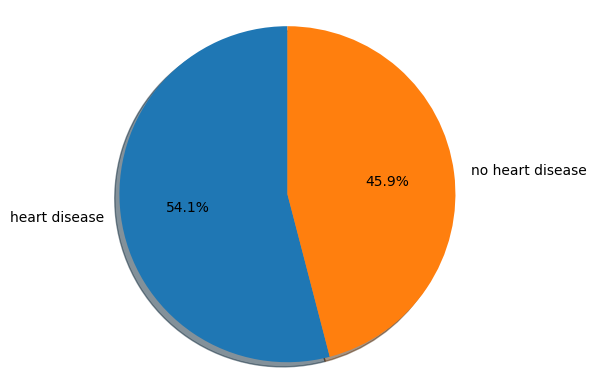

In [ ]:
labels = "heart disease", "no heart disease"
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.target.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

**Insight :**
Setelah dilakukan data prepocessing, pasien yang terdiagnosis Heart Disease sebanyak 159 orang dang yang tidak 132 orang.

# EDA (Exploraty Data Analysis)

In [ ]:
#check korelasi
df1.corr('spearman')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.088542,-0.082815,0.296328,0.188400,0.128963,-0.126741,-0.400325,0.100084,0.254951,-0.171566,0.390350,0.079991,-0.240299
sex,-0.088542,1.000000,-0.064628,-0.055886,-0.164817,0.039139,-0.075779,-0.046590,0.136141,0.103021,-0.016917,0.106289,0.258442,-0.289890
cp,-0.082815,-0.064628,1.000000,0.028468,-0.086698,0.113201,0.077211,0.317402,-0.407312,-0.142269,0.139140,-0.228618,-0.210304,0.439808
trestbps,0.296328,-0.055886,0.028468,1.000000,0.145267,0.164977,-0.120662,-0.040911,0.053633,0.146632,-0.077113,0.084853,0.035169,-0.127446
chol,0.188400,-0.164817,-0.086698,0.145267,1.000000,0.020808,-0.168940,-0.035115,0.087592,0.024172,0.000464,0.137764,0.081302,-0.115167
fbs,0.128963,0.039139,0.113201,0.164977,0.020808,1.000000,-0.078138,-0.015968,-0.000781,0.037857,-0.041539,0.151328,-0.000657,-0.009625
restecg,-0.126741,-0.075779,0.077211,-0.120662,-0.168940,-0.078138,1.000000,0.087352,-0.083589,-0.088491,0.124749,-0.137011,0.007714,0.160486
thalach,-0.400325,-0.046590,0.317402,-0.040911,-0.035115,-0.015968,0.087352,1.000000,-0.400537,-0.424214,0.429479,-0.286863,-0.154864,0.425302
exang,0.100084,0.136141,-0.407312,0.053633,0.087592,-0.000781,-0.083589,-0.400537,1.000000,0.300222,-0.274391,0.187602,0.247483,-0.425524
oldpeak,0.254951,0.103021,-0.142269,0.146632,0.024172,0.037857,-0.088491,-0.424214,0.300222,1.000000,-0.572692,0.251947,0.243983,-0.411512


## HeatMap

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

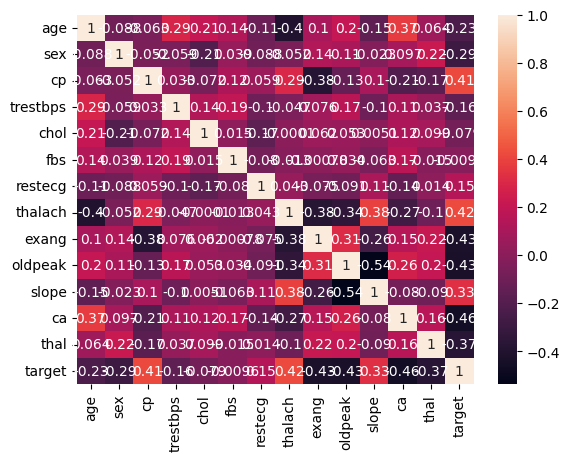

In [ ]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

<ipython-input-44-4e92bc710abd>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

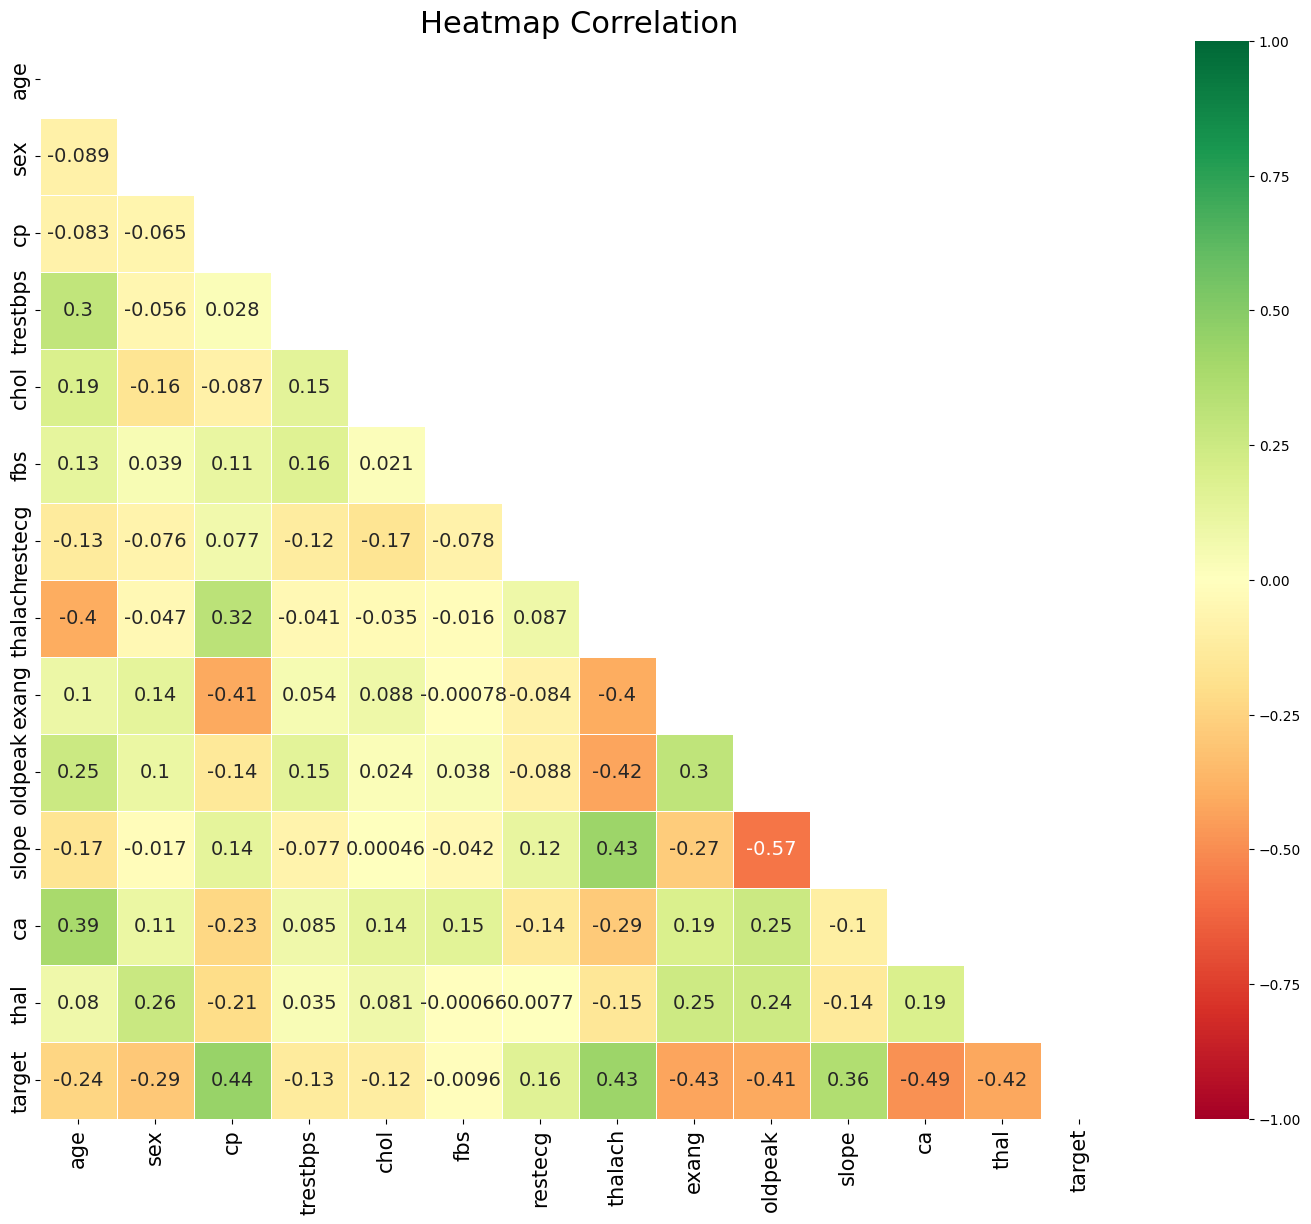

In [ ]:
#Heatmap Correlation
import seaborn as sns

corr = df1.corr('spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.7, annot_kws={"size": 14})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

**Insight :**
Korelasi yang paling kuat:
- cp vs target (0.44)
- thalach vs target (0.43)
- slope vs target (0.36)
Jika korelasi bernilasi positif, maka hubungan kedua variabel dikatakan searah yaitu jika variabel X meningkat maka variabel Y juga akan meningkat

## Korelasi dengan Scatterplot

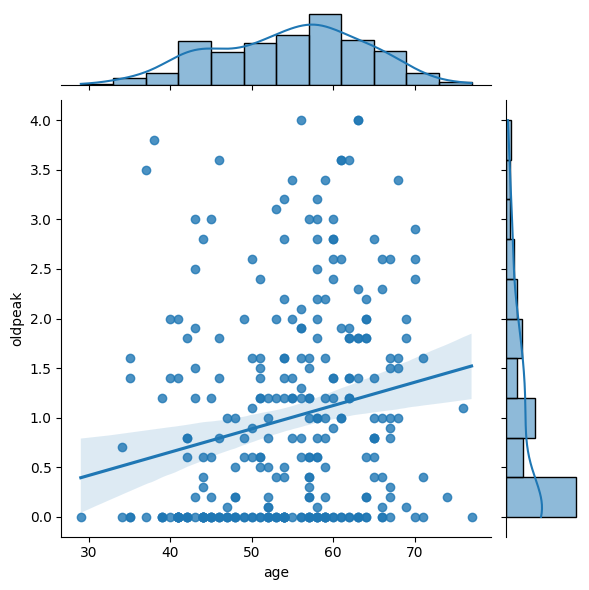

In [ ]:
#Age vs Oldpeak
sns.jointplot(x='age', y='oldpeak', data=df1, kind="reg")

**Insight:**
Age dan Oldpeak memiliki hubungan pola yang positif



## Korelasi With Hexbin Plot

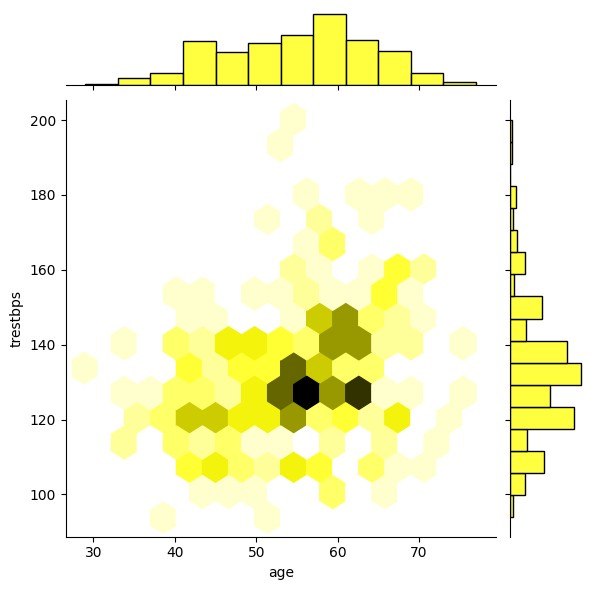

In [ ]:
# Age vs Trestbps
sns.jointplot(x="age", y="trestbps", data=df1, kind="hex", color="yellow")

## Barchat

<Axes: xlabel='slope', ylabel='target'>

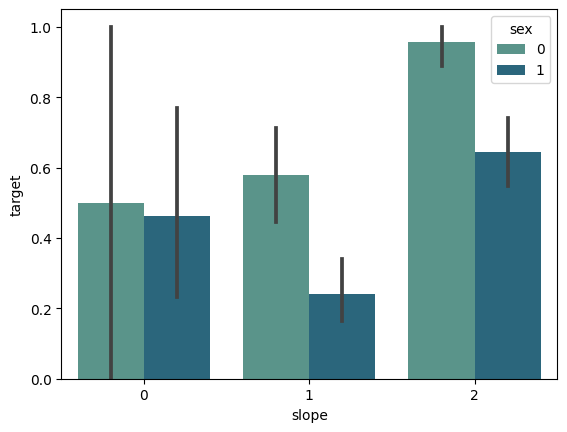

In [ ]:
# slope vs target (plt.scatter(X,Y))
sns.barplot(x='slope', y='target', hue='sex', data=df1,palette='crest')

**Insight :**
Berdasarkan target Heart Disease lebih cenderung jenis kelamin male untuk semua kategori slope, male mempunyai trend postifi karena naik untuk setiap slope, sedangkan female cenderung fluktuatif

## Pairplot

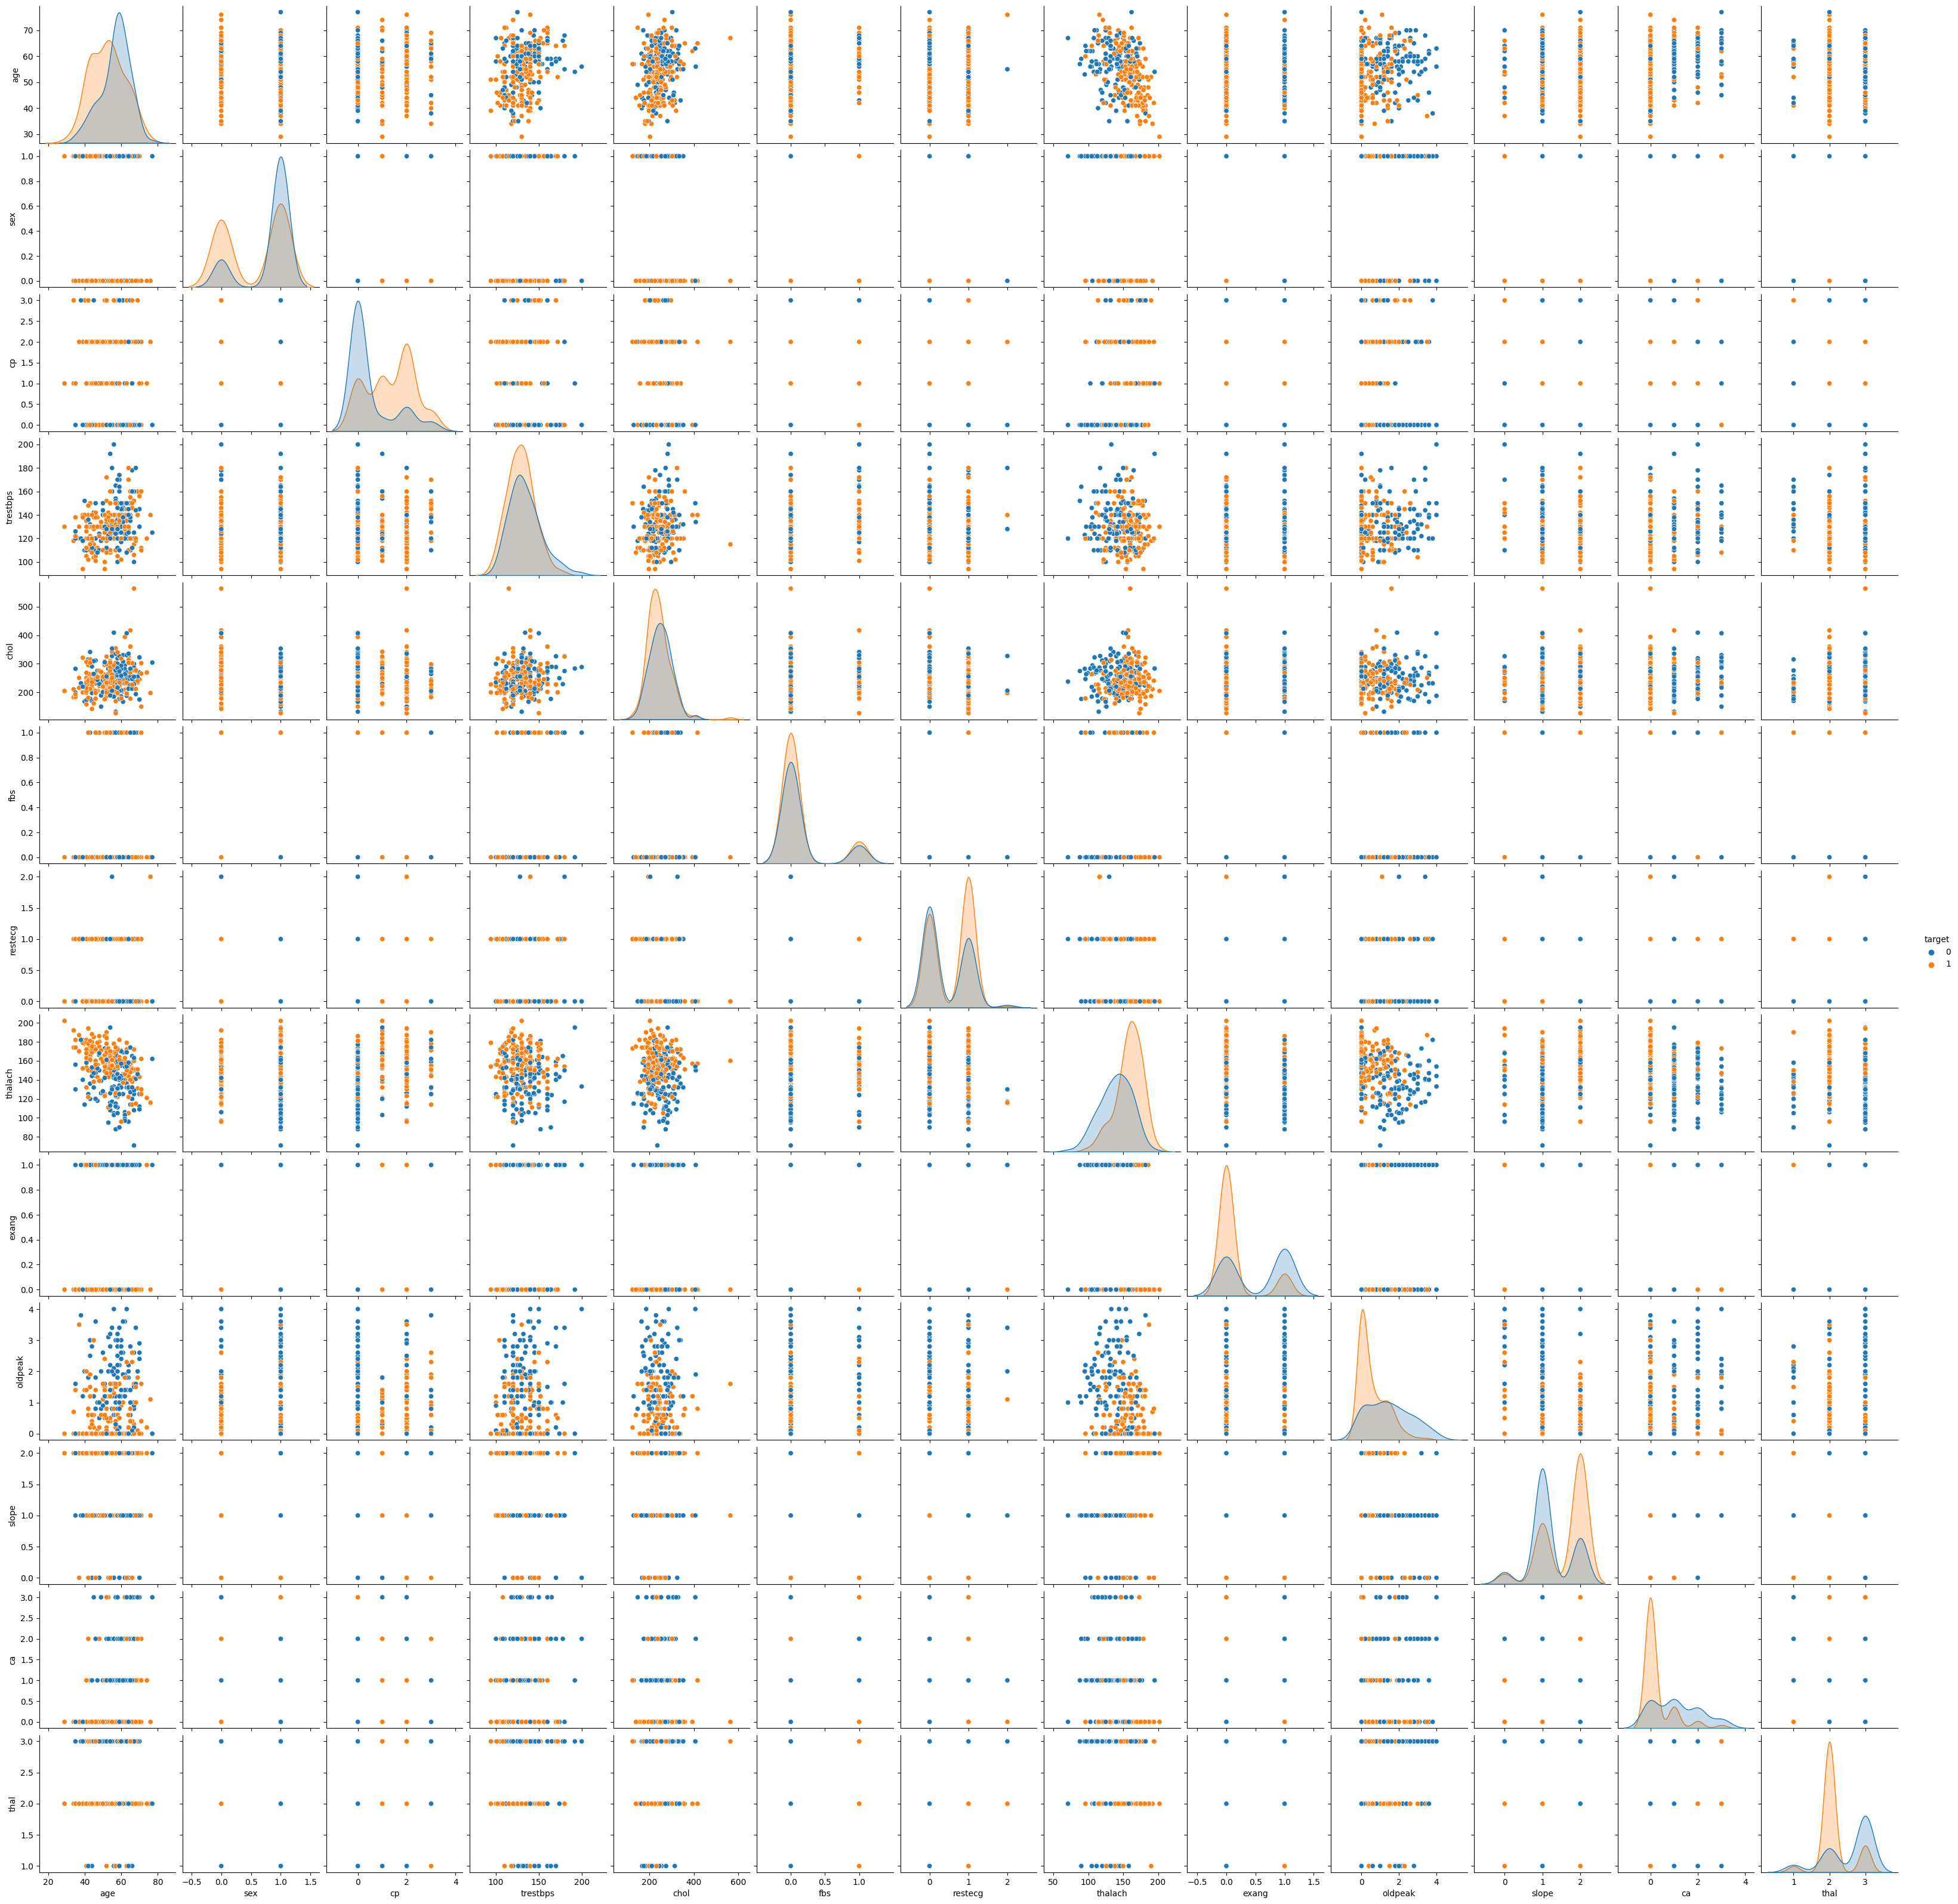

In [ ]:
# thalach vs target (plt.scatter(X,Y))
sns.pairplot(df1, hue="target")

**Insight :**
- Secara umum yang terdiagnosa penyakit jantung dengan yang tidak cenderung hampir sama. Namun yang tidak terdiagnosis jantung memiliki umur yang lebih tua
- Secara umum yang terdiagnosis penyakit jantung memiliki chest pain type non anginal pain
dst

#Features Separating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

In [ ]:
# Getting features and target
x = df1.drop(["target"], axis=1)
y = df1["target"]

#Data Normalization

In [ ]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

#Splitting Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [ ]:
#checking the shape of X_train and X_test
x_train.shape, x_test.shape

((232, 13), (59, 13))

# Machine Learning Model

In [ ]:
#Logistic Regression
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [ ]:
#Logistic Regression Accuracy
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 81.36% .:.


In [ ]:
#Random Forest
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [ ]:
#Random Forest Accuracy
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 86.44% .:.


In [ ]:
#K-Nearest Neighbour
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

In [ ]:
#K-Nearest Neighbour Accuracy
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

.:. K-Nearest Neighbour Accuracy: 62.71% .:.


In [ ]:
#Support Vector Machine
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

In [ ]:
#Support Vector Machine  Accuracy
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Support Vector Machine Accuracy: 71.19% .:.


In [ ]:
#Gaussian Naive Bayes
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

In [ ]:
#Gaussian Naive Bayes Accuracy
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

.:. Gaussian Naive Bayes Accuracy: 69.49% .:.


In [ ]:
#Decision Tree
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

In [ ]:
#Decision Tree Accuracy
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

.:. Decision Tree Accuracy: 76.27% .:.


# Conclusion

In [ ]:
#Create Accuracy Comparison Model
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine',
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest'
                                  ],
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100,
                                     ]})

#Create Accuracy Comparison Model
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,86.440678
Logistic Regression,81.355932
Decision Tree,76.271186
Support Vector Machine,71.186441
Gaussian Naive Bayes,69.491525
K-Nearest Neighbour,62.711864


Setelah menggunakan 6 model Machine Learning. Didapatkan,dari 6 hasil akurasi model Machine Learning didapatkan akurasi model paling tinggi yaitu K-Nearst Neighbour dengan nilai akurasi 86.440678